### Import Packages

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Create Graphs

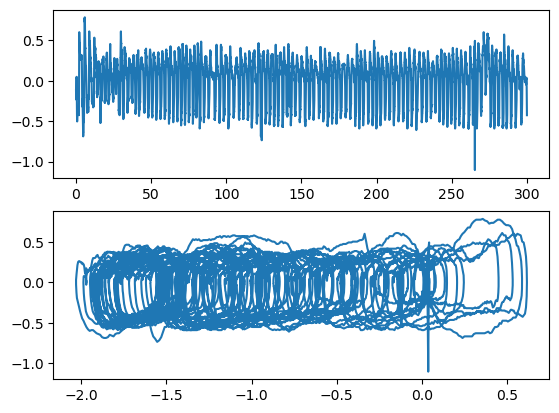

In [4]:
data = pd.read_csv("spiro-quiet.csv")

plt.figure(1)
plt.subplot(211)
plt.plot(data['Run 1: Time (s)'], data['Run 1: Flow Rate (L/s)'])
plt.subplot(212)
plt.plot(data['Run 1: Volume (L)'], data["Run 1: Flow Rate (L/s)"])